# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import pprint
from datetime import date
from decimal import Decimal


# Import API key
import api_keys

# Import citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/weather_data.csv"
#output_data_file = "weather_data.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for coordinates in lat_lngs:
    city = citipy.nearest_city(coordinates[0], coordinates[1]).city_name
# Replace spaces with "_" to create url correctly 
    city = city.replace(" ", "_")    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Openweather map API key
api_key = api_keys.api_key

In [4]:
#Create a function to get json value
def get_weather_json(city, api_key):
    url = "http://api.openweathermap.org/data/2.5/forecast"
    r = requests.get(url, params={
        "appid": api_key,
        "q": city,
        "units": "imperial"
    })
    if r.status_code ==200:
        r_json = r.json()
        return r_json
    else:
        return None

In [5]:
# Print the output json values
#pprint.pprint(get_weather_json(city,api_key),indent =4)

{   'city': {   'coord': {'lat': 55.7433, 'lon': -97.8635},
                'country': 'CA',
                'id': 6165406,
                'name': 'Thompson',
                'population': 12467,
                'sunrise': 1578236375,
                'sunset': 1578262405,
                'timezone': -21600},
    'cnt': 40,
    'cod': '200',
    'list': [   {   'clouds': {'all': 100},
                    'dt': 1578258000,
                    'dt_txt': '2020-01-05 21:00:00',
                    'main': {   'feels_like': -4.02,
                                'grnd_level': 981,
                                'humidity': 87,
                                'pressure': 1008,
                                'sea_level': 1008,
                                'temp': 7.57,
                                'temp_kf': 1.18,
                                'temp_max': 7.57,
                                'temp_min': 5.45},
                    'sys': {'pod': 'd'},
                    'weather': 

In [6]:
# Declare the list of elements for data frame
out_cities = []
cloudiness = []
country = []
date = []
humidity = []
latitude = []
longitude = []
max_temp = []
wind_speed = []


In [7]:
# Set the initial values for set and record variables
record = 0
set = 1

# Print the output as per the required output
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

for in_city in cities:
    response = get_weather_json(in_city.replace(" ", "_"), api_key)
    
    if response:
        # Append the values for all DataFrame variables 
        cloudiness.append(response['list'][0]['clouds']['all'])
        city_data = response['city']
        country.append(city_data['country'])
        date.append(response['list'][0]['dt'])
        humidity.append(response['list'][0]['main']['humidity'])
        latitude.append(Decimal(city_data['coord']['lat']).quantize(Decimal(10) ** -2  ))
        longitude.append(Decimal(city_data['coord']['lon']).quantize(Decimal(10) ** -2  ))
        max_temp.append(Decimal(response['list'][0]['main']['temp_max']).quantize(Decimal(10) ** -2  ))
        wind_speed.append(response['list'][0]['wind']['speed'])
        # Check to increment the value of set as per the required output and append the cities for DataFrame
        if record > 49:
            record = 1
            set += 1
            out_cities.append(in_city)
        else:
            record += 1
            out_cities.append(in_city)
        print(f"Processing Record {record} of Set {set} | {in_city}")
        #time.sleep(0.001)
    # Check if the city is not in the list
    else:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------") 
        

Beginning Data Retrieval
-------------------------------
City not found. Skipping...
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | lebu
Processing Record 3 of Set 1 | jamestown
City not found. Skipping...
Processing Record 4 of Set 1 | provideniya
Processing Record 5 of Set 1 | arman
Processing Record 6 of Set 1 | yulara
Processing Record 7 of Set 1 | ulkan
Processing Record 8 of Set 1 | roma
Processing Record 9 of Set 1 | kruisfontein
Processing Record 10 of Set 1 | rikitea
City not found. Skipping...
Processing Record 11 of Set 1 | hithadhoo
Processing Record 12 of Set 1 | gilbues
Processing Record 13 of Set 1 | luga
Processing Record 14 of Set 1 | bethel
City not found. Skipping...
Processing Record 15 of Set 1 | zaterechnyy
City not found. Skipping...
Processing Record 16 of Set 1 | korsakovo
Processing Record 17 of Set 1 | lakatoro
City not found. Skipping...
Processing Record 18 of Set 1 | cidreira
Processing Record 19 of Set 1 | ancud
Processing Record 2

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# Set the dictionary for the DataFrame

raw_data = {
            "City": out_cities,
            "Cloudiness": cloudiness,
            "Country": country,
            "Date": date,
            "Humidity": humidity ,
            "Lat": latitude ,
            "Lng": longitude ,
            "Max Temp": max_temp ,
            "Wind Speed": wind_speed  
            
            }    

In [9]:
# Convert to DataFrame and display the DataFrame
df_weather = pd.DataFrame(raw_data)
df_weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,hermanus,100,ZA,1578258000,75,-34.42,19.24,66.09,11.03
1,lebu,0,ET,1578258000,71,8.96,38.73,55.35,2.39
2,jamestown,89,AU,1578258000,87,-33.21,138.60,56.25,5.93
3,provideniya,100,RU,1578258000,82,64.42,-173.23,-10.43,9.08
4,arman,72,RU,1578258000,67,59.70,150.17,17.53,7.99


In [10]:
# Save the output to a csv file "weather_data.csv"
df_weather.to_csv('Output_CSV/weather_data.csv')
#df_weather.to_csv("weather_data.csv")

In [11]:
# Display the count of all the variables
df_weather.count()

City          474
Cloudiness    474
Country       474
Date          474
Humidity      474
Lat           474
Lng           474
Max Temp      474
Wind Speed    474
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [12]:
from datetime import date
today_date = date.today().strftime('%m/%d/%Y') 
today_date

'01/05/2020'

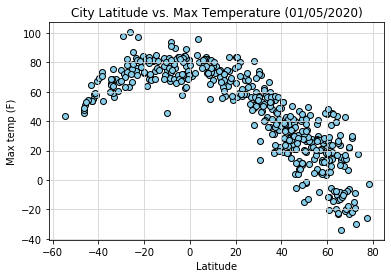

In [13]:
plt.scatter(df_weather["Lat"], df_weather["Max Temp"], edgecolors = "black", facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature ("+ today_date + ")")
plt.xlabel("Latitude")
plt.ylabel("Max temp (F)")
#plt.xlim(-80,100)
#plt.ylim(min(df_weather["Max Temp"])-20 ,max(df_weather["Max Temp"])+20)
plt.grid(b = True, which = "major", axis = "both", linestyle = "-", color= "lightgrey")

#plt.savefig("LatitudeVsTemperaturePlot.png")
plt.savefig("Output_Plots/LatitudeVsTemperaturePlot.pnge.png")
plt.show()


#### Latitude vs. Humidity Plot

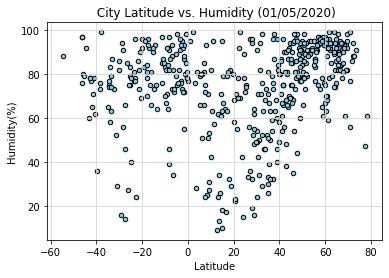

In [14]:
plt.scatter(df_weather["Lat"], df_weather["Humidity"], edgecolors = "black", facecolors="skyblue", s=20)
#plt.xlim(-60, 80)
#plt.ylim(0, 100)
plt.title(" City Latitude vs. Humidity (" + today_date + ")" ) 
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid(b = True, which = "major", axis = "both", linestyle = "-", color= "lightgrey")

plt.savefig("Output_Plots/LatitudeVsHumidityPlot.png")
plt.show()

#### Latitude vs. Cloudiness Plot

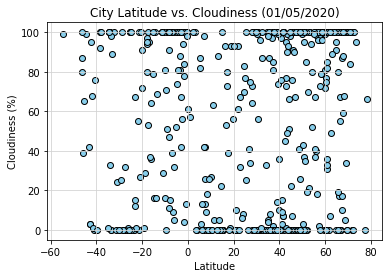

In [15]:
plt.scatter(df_weather["Lat"], df_weather["Cloudiness"], edgecolors = "black", facecolors="skyblue")
#plt.xlim(-60, 80)
#plt.ylim(0, 100)
plt.title("City Latitude vs. Cloudiness (" + today_date + ")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(b = True, which = "major", axis = "both", linestyle = "-", color= "lightgrey")

plt.savefig("Output_Plots/LatitudeVsCloudinessPlot.png")
plt.show()

#### Latitude vs. Wind Speed Plot

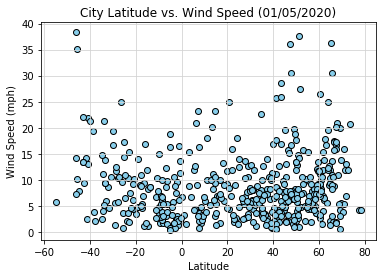

In [16]:
plt.scatter(df_weather["Lat"], df_weather["Wind Speed"], edgecolors = "black", facecolors="skyblue")
#plt.xlim(-60, 80)
#plt.ylim(0, 100)
plt.title("City Latitude vs. Wind Speed (" + today_date + ")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(b = True, which = "major", axis = "both", linestyle = "-", color= "lightgrey")

plt.savefig("Output_Plots/LatitudeVsWindSpeedPlot.png")
plt.show()